Let's first setup our imports

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import cluster, metrics, preprocessing
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
plt.style.use('fivethirtyeight')
from scipy.stats import mode

%matplotlib inline 


## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [4]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [3]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [15]:
X = df.copy()
y = pd.DataFrame(iris.target, columns = ['target'])

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

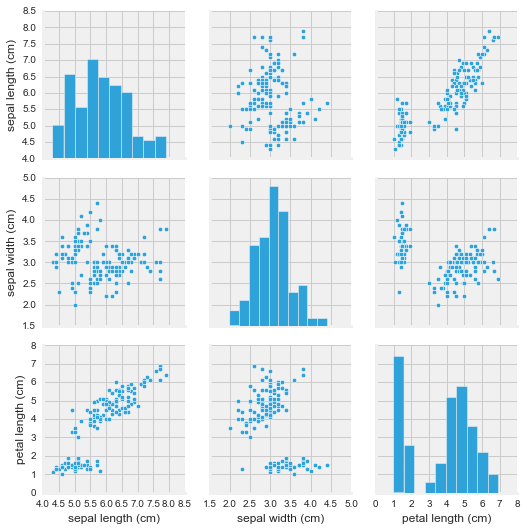

In [10]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

In [18]:
X_scaled = preprocessing.MinMaxScaler().fit_transform(X)

In [19]:
pd.DataFrame(X_scaled, columns=df.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [37]:
k = 3
kmeans = cluster.KMeans(n_clusters =k)
kmeans.fit(X)
labels = kmeans.labels_
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

Compute the labels and centroids

In [33]:
labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

/Users/michael/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.


In [34]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.61800641582154736

TypeError: unhashable type

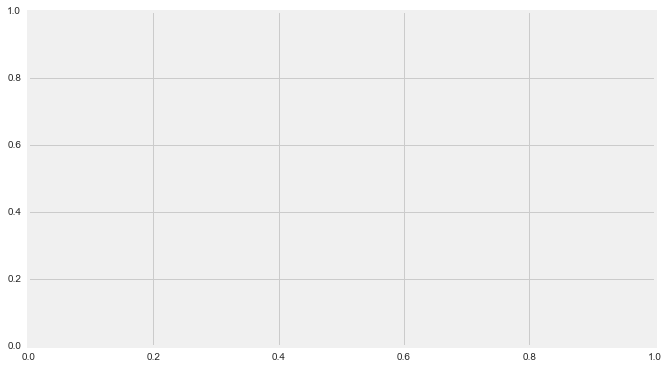

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow');
ax.set_xticks([]);
ax.set_yticks([]);

plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=500, linewidths=5,
            color='k', zorder=10)

## Step 4: Evaluate the clusters

First, go ahead and plot the results of your clustering analysis

Plot the clusters

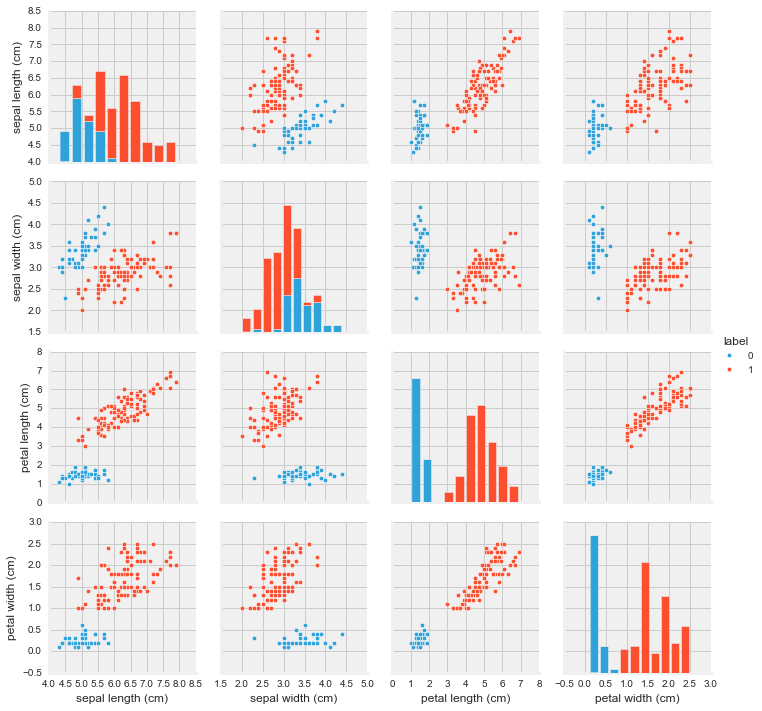

In [25]:
cols = df.columns[:-1]
sns.pairplot(df, x_vars=cols, y_vars=cols, hue = 'label')

Plot the predicted vs actual classifcations to see how our clustering analysis compares

Check the centroids to see where each cluster is lying 

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

Compute the silhoutte coefficient to see how consistent our data is within the clusters

Calculate the Precision, Recall, and F - Score to see the test's accuracy

Compute the Confusion Matrix to test the performance of the clustering analysis